In [6]:
import numpy as np
import pandas as pd
import nltk
import plotly
import re
          
plotly.offline.init_notebook_mode() # run at the start of every notebook
import cufflinks as cf

cf.go_offline()
cf.getThemes()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from IPython.display import display

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "C:\Users\natel\Anaconda3\python.exe"
  * The NumPy version is: "1.19.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: cannot import name '_set_madvise_hugepage' from 'numpy.core._multiarray_umath' (C:\Users\natel\Anaconda3\lib\site-packages\numpy\core\_multiarray_umath.cp37-win_amd64.pyd)


In [7]:
import numpy

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "C:\Users\natel\Anaconda3\python.exe"
  * The NumPy version is: "1.19.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: cannot import name '_set_madvise_hugepage' from 'numpy.core._multiarray_umath' (C:\Users\natel\Anaconda3\lib\site-packages\numpy\core\_multiarray_umath.cp37-win_amd64.pyd)


In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
fulltest = [df_train,df_test]

NameError: name 'pd' is not defined

In [178]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
def null_values(DataFrame_Name):
    
    sum_null = DataFrame_Name.isnull().sum()
    total_count = DataFrame_Name.isnull().count()
    percent_nullvalues = sum_null/total_count * 100
    df_null = pd.DataFrame()
    df_null['Total_values'] = total_count
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = percent_nullvalues
    df_null = df_null.sort_values(by='Null_Count',ascending = False)

    return(df_null)

In [180]:
null_values(df_train)

,Total_values,Null_Count,Percent
Cabin,891,687,77.104377
Age,891,177,19.865320
Embarked,891,2,0.224467
PassengerId,891,0,0.000000
Survived,891,0,0.000000
Pclass,891,0,0.000000
Name,891,0,0.000000
Sex,891,0,0.000000
SibSp,891,0,0.000000
Parch,891,0,0.000000


In [181]:
null_values(df_test)

,Total_values,Null_Count,Percent
Cabin,418,327,78.229665
Age,418,86,20.574163
Fare,418,1,0.239234
PassengerId,418,0,0.000000
Pclass,418,0,0.000000
Name,418,0,0.000000
Sex,418,0,0.000000
SibSp,418,0,0.000000
Parch,418,0,0.000000
Ticket,418,0,0.000000


In [182]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
df_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [184]:
# start the correlation
corr = df_train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Pclass         0.114569
Fare           0.066207
Parch          0.006663
Age            0.005963
SibSp          0.001248
PassengerId    0.000025
Name: Survived, dtype: float64

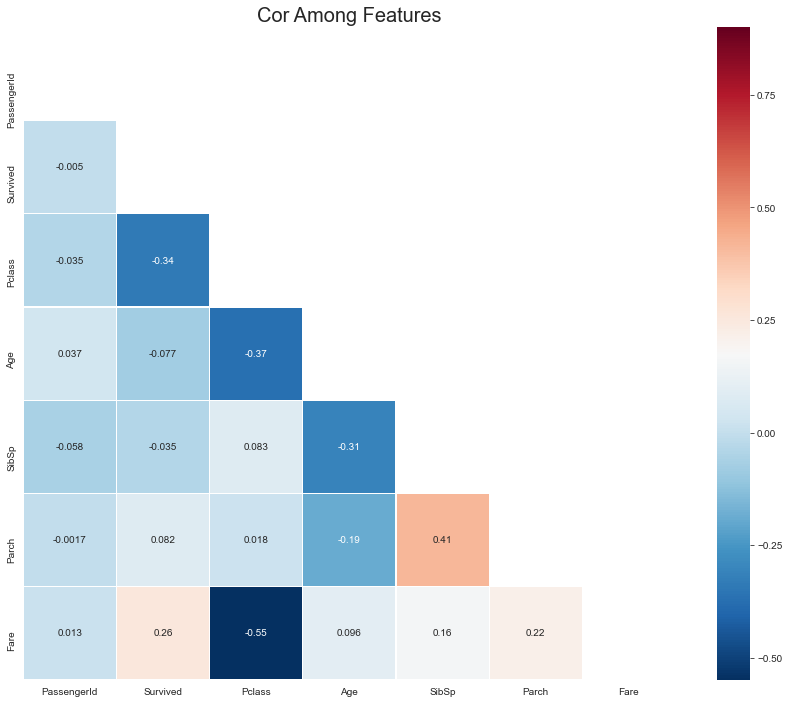

In [185]:
# heatmap to see correlation between features
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(15,12))
sns.heatmap(df_train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Cor Among Features", y=1.04, fontsize=20);

In [186]:
# Pclass already an integer


df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


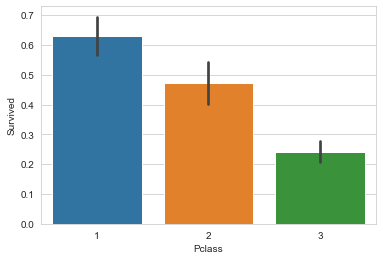

In [187]:
sns.barplot('Pclass','Survived', data=df_train)

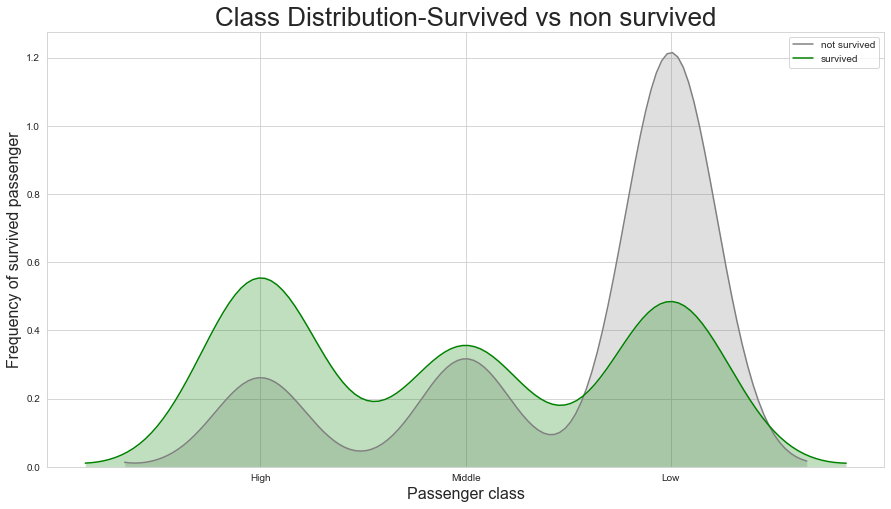

In [188]:
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(df_train.Pclass[df_train.Survived==0], color='grey', shade=True, label='not survived')
ax=sns.kdeplot(df_train.Pclass[df_train.Survived==1], color='g', shade=True, label='survived')
plt.title('Class Distribution-Survived vs non survived', fontsize=26)
plt.ylabel("Frequency of survived passenger", fontsize=16)
plt.xlabel("Passenger class", fontsize=16)
labels = ['High', 'Middle', 'Low']
plt.xticks(sorted(df_train.Pclass.unique()), labels);

In [189]:
# sex
females=df_train['Sex'].apply(lambda x: x.count('female')).sum()
print('Total Males=',891-females)
print('Total females=', females)


Total Males= 577
Total females= 314


In [190]:
# impact on sex
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


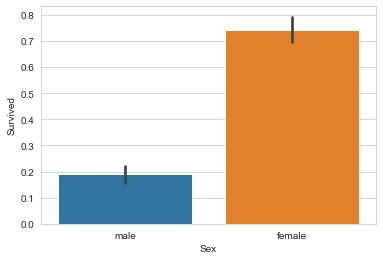

In [191]:
sns.barplot(x='Sex', y='Survived', data=df_train)

In [192]:
# Embarked
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


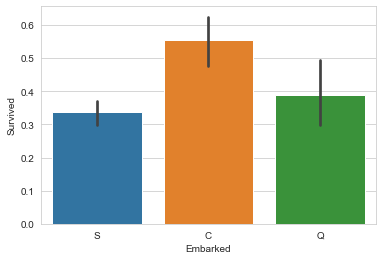

In [193]:
sns.barplot(x='Embarked', y='Survived', data=df_train)

In [194]:
#Sibsp and parch = family members
df_train['Family_members'] = df_train['SibSp'] + df_train['Parch']
df_test['Family_members'] = df_test['SibSp'] + df_test['Parch']
df_train[['Family_members','Survived']].groupby(['Family_members'],as_index=False).mean()

,Family_members,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


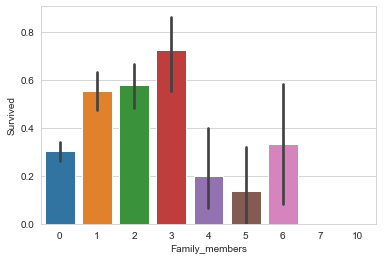

In [195]:
sns.barplot(x='Family_members', y='Survived', data=df_train)

In [196]:
df_train=df_train.drop(['PassengerId'], axis=1)
df_test = df_test.drop(['PassengerId'], axis=1)

In [197]:
fulldata = [df_train,df_test]

In [198]:
fulldata

[     Survived  Pclass                                               Name  \
 0           0       3                            Braund, Mr. Owen Harris   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           1       3                             Heikkinen, Miss. Laina   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           0       3                           Allen, Mr. William Henry   
 ..        ...     ...                                                ...   
 886         0       2                              Montvila, Rev. Juozas   
 887         1       1                       Graham, Miss. Margaret Edith   
 888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
 889         1       1                              Behr, Mr. Karl Howell   
 890         0       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked

In [199]:
df_train=df_train.drop(['Cabin', 'Ticket'], axis=1)
df_test=df_test.drop(['Cabin', 'Ticket'], axis=1)

In [200]:
fulldata = [df_train,df_test]

In [201]:
fulldata

[     Survived  Pclass                                               Name  \
 0           0       3                            Braund, Mr. Owen Harris   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           1       3                             Heikkinen, Miss. Laina   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           0       3                           Allen, Mr. William Henry   
 ..        ...     ...                                                ...   
 886         0       2                              Montvila, Rev. Juozas   
 887         1       1                       Graham, Miss. Margaret Edith   
 888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
 889         1       1                              Behr, Mr. Karl Howell   
 890         0       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     Fare Embarked  Family_members  
 0   

In [202]:
for dataset in fulldata:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [203]:
for dataset in fulldata:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


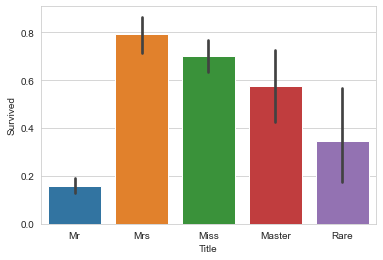

In [204]:
sns.barplot(x='Title', y='Survived', data=df_train)

In [205]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,Rare
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,3,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,0,Mr


In [206]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

In [207]:
df_train=df_train.drop(['Name'], axis=1)
df_test=df_test.drop(['Name'], axis=1)

In [208]:
# Age

df_train[['Title','Age']].groupby(['Title'], as_index=False).mean().sort_values(by='Age')

,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.368090
3,Mrs,35.788991
4,Rare,45.545455


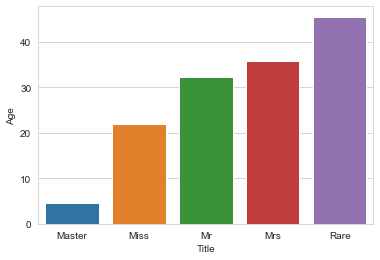

In [209]:
Mean_Age = df_train[['Title','Age']].groupby(['Title'],as_index = False).mean().sort_values(by='Age')
sns.barplot(x='Title', y='Age', data=Mean_Age)

In [210]:
df_train['Age'] = df_train['Age'].fillna(-1)
df_test['Age'] = df_test['Age'].fillna(-1)  
full_data = [df_train,df_test]

In [211]:
# age
for dataset in full_data:
    
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Master'), 'Age'] = 4.57
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Miss'), 'Age'] = 21.84
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mr'), 'Age'] = 32.36
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mrs'), 'Age'] = 35.78
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Rare'), 'Age'] = 45.54
    dataset['Age'] = dataset['Age'].astype(int)   
    

In [212]:
full_data = [df_train, df_test]
for dataset in full_data:
    
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [213]:
df_train[['Sex','Age', 'Survived']].groupby(['Sex', 'Age'], as_index=False).mean()

,Sex,Age,Survived
0,female,0,0.593750
1,female,1,0.750000
2,female,2,0.671875
3,female,3,0.756757
4,female,4,0.767442
5,female,5,0.851852
6,female,6,0.770833
7,male,0,0.550000
8,male,1,0.114286
9,male,2,0.109375


C:\Users\natel\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 0.98, 'AgeBand, Sex vs Survived')

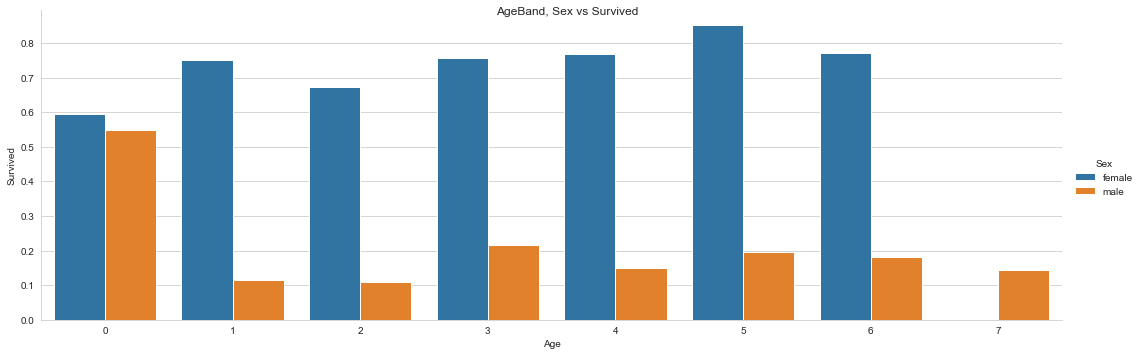

In [214]:
sas = df_train[['Sex','Age','Survived']].groupby(['Sex','Age'], as_index=False).mean()
sns.factorplot('Age','Survived','Sex', data=sas, aspect=3, kind='bar')
plt.suptitle('AgeBand, Sex vs Survived')

In [215]:
fulldata = [df_train, df_test]
for dataset in fulldata:
    
    dataset.loc[ dataset['Family_members'] == 0, 'Family_members_Band'] = 0
    dataset.loc[(dataset['Family_members'] == 1)|(dataset['Family_members'] == 2),'Family_members_Band'] = 1
    dataset.loc[ dataset['Family_members'] == 3, 'Family_members_Band'] = 2
    dataset.loc[(dataset['Family_members'] == 4)|(dataset['Family_members'] == 5),'Family_members_Band'] = 3
    dataset.loc[ dataset['Family_members'] == 6, 'Family_members_Band'] = 4
    dataset.loc[(dataset['Family_members'] == 7)|(dataset['Family_members'] == 10),'Family_members_Band'] = 5
    dataset['Family_members_Band'] = dataset['Family_members_Band'].astype(int)

In [216]:
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


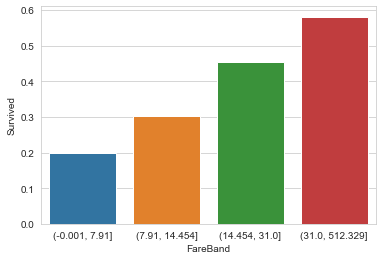

In [217]:
FarePlot = df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand')
sns.barplot(x='FareBand', y='Survived', data=FarePlot)

In [218]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].dropna().mean())

In [219]:
full_data = [df_train,df_test]
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare_Band'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare_Band'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare_Band'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare_Band'] = 3
    dataset['Fare_Band'] = dataset['Fare_Band'].astype(int)

Text(0.5, 0.98, 'Fareband vs Survived')

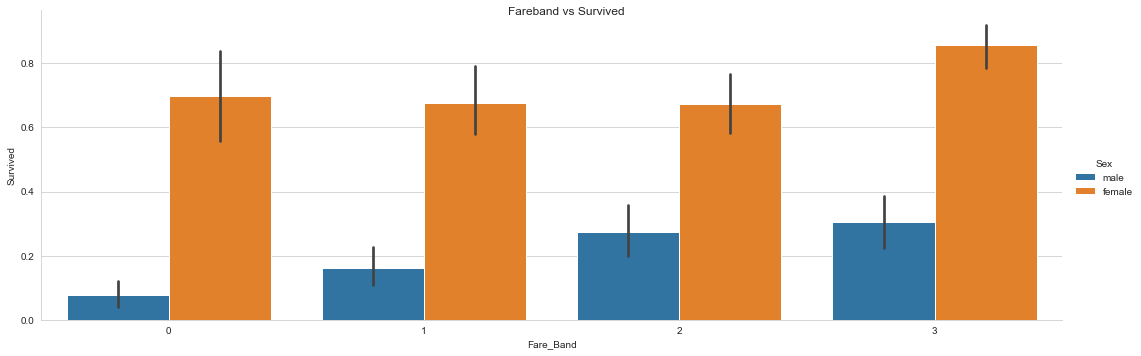

In [220]:
sns.factorplot('Fare_Band', 'Survived', 'Sex', data=df_train, aspect=3, kind='bar')
plt.suptitle('Fareband vs Survived')

In [221]:
# Embarked
frequent = df_train['Embarked'].mode()[0]
frequent

'S'

In [222]:
fulldata = [df_train,df_test]
for dataset in fulldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(frequent)
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


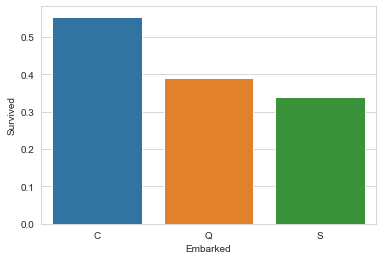

In [223]:
embarkedgraph = df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x='Embarked', y='Survived', data=embarkedgraph)

In [224]:
df_train = df_train.drop(['SibSp', 'Parch', 'Fare', 'Family_members', 'FareBand'], axis=1)


In [225]:
df_test = df_test.drop(['SibSp', 'Parch', 'Fare', 'Family_members'], axis=1)

In [226]:
# one hot encoding
X_train = pd.get_dummies(df_train, columns=['Pclass','Sex','Age','Embarked','Title','Family_members_Band','Fare_Band'], prefix=['Pclass','Sex'
                                                                ,'Age','Embarked','Title','Family_members_Band','Fare_Band'])

In [227]:
Y_train = X_train['Survived']
X_train = X_train.drop('Survived', axis=1)

In [228]:
X_train.shape

(891, 31)

In [229]:
X_test = pd.get_dummies(df_test, columns=['Pclass','Sex','Age','Embarked','Title','Family_members_Band','Fare_Band'], prefix=['Pclass','Sex','Age','Embarked','Title','Family_members_Band','Fare_Band'])

In [230]:
X_test.shape

(418, 31)

In [231]:
df_test.head()

,Pclass,Sex,Age,Embarked,Title,Family_members_Band,Fare_Band
0,3,male,5,Q,Mr,0,0
1,3,female,6,S,Mrs,1,0
2,2,male,6,Q,Mr,0,1
3,3,male,3,S,Mr,0,1
4,3,female,2,S,Mrs,1,1


In [232]:
# Machine learning models
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

78.11 %


In [233]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.01 %


In [234]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

83.61 %


C:\Users\natel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [235]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

85.86 %


In [236]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

63.64 %


In [237]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

82.27 %


C:\Users\natel\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [238]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

82.83 %


In [239]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

90.01 %


In [240]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)

result_df.head(9)

,Model,Score
3,Random Forest,90.01
7,Decision Tree,90.01
1,KNN,85.86
2,Logistic Regression,83.61
0,Support Vector Machines,82.83
5,Perceptron,82.27
6,Stochastic Gradient Decent,78.11
4,Naive Bayes,63.64


In [241]:
# Random Forest , Testing with oob score

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.01 %


In [242]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.27 %


In [1]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

NameError: name 'pd' is not defined